In [14]:
from marked_words import marked_words
import pandas as pd
import numpy as np
def pprint(dic):
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        print("%s, %.2f" % (word[0],word[1]))

In [489]:
df=pd.read_csv('data/dv3/dv3_main_generations.csv')
nb_df = pd.read_csv('data/dv3/dv3_generations_nb.csv')
nb_df=nb_df.drop(0)
df=pd.concat([df,nb_df])

# Table 3

## Top words using Marked Words

In [490]:
for race in df['race'].unique():
    print('\n Top words for %s \n-------' % race)
    pprint(marked_words(df, [race], ['race'],['a White']))


 Top words for a White 
-------

 Top words for a Black 
-------
black, 6.87
community, 3.09
strength, 2.83
her, 2.72
resilient, 2.60
justice, 2.49
leader, 2.47
beautiful, 2.40
proud, 2.35
determined, 2.27
curly, 2.18
am, 2.14
powerful, 2.13
strong, 2.05
power, 2.05
african, 2.05
world, 2.03
deep, 1.98
difference, 1.98

 Top words for an Asian 
-------
asian, 9.07
almondshaped, 3.76
dark, 3.31
black, 3.27
petite, 3.06
heritage, 2.55
culture, 2.49
traditional, 2.27
chinese, 2.20
smooth, 2.02
my, 1.97

 Top words for a Middle-Eastern 
-------
middleeastern, 7.16
middle, 5.51
eastern, 4.80
traditional, 4.59
culture, 4.58
dark, 4.19
faith, 3.39
east, 3.22
likely, 2.87
my, 2.77
family, 2.60
heritage, 2.57
long, 2.50
olive, 2.50
cultural, 2.46
region, 2.44
their, 2.38
am, 2.38
beard, 2.37
thick, 2.36
traditions, 2.34
headscarf, 2.28
abaya, 2.28
scarf, 2.28
the, 2.24
religious, 2.23
colorful, 2.19
hijab, 2.14
robe, 2.02
was, 2.02
tradition, 2.00
robes, 2.00
tunic, 2.00
head, 1.99
flowing, 1.

In [491]:
print('\n Top words for %s \n-------' % 'W')
pprint(marked_words(df, ['W'], ['gender'],['M']))
print('\n  Top words for %s \n-------' % 'M')
pprint(marked_words(df, ['M'], ['gender'],['W']))


 Top words for W 
-------
she, 17.39
her, 15.24
woman, 11.80
latina, 5.13
petite, 4.48
independent, 4.15
women, 3.94
long, 3.16
beautiful, 3.15
beauty, 3.11
herself, 3.00
blonde, 2.98
graceful, 2.96
delicate, 2.90
colorful, 2.75
figure, 2.69
vibrant, 2.64
resilient, 2.62
grace, 2.59
full, 2.54
curves, 2.39
intricate, 2.36
natural, 2.35
am, 2.33
modest, 2.33
bright, 2.28
bold, 2.23
fiercely, 2.21
hijab, 2.19
capable, 2.11
afraid, 2.10
passionate, 2.05
spirit, 2.00
jewelry, 1.97
mother, 1.96

  Top words for M 
-------
he, 17.11
his, 11.58
man, 10.66
tall, 5.11
muscular, 4.35
build, 4.31
shirt, 4.04
short, 3.91
beard, 3.59
latino, 3.46
him, 3.35
broad, 3.33
sports, 3.23
himself, 3.10
athletic, 3.01
jawline, 2.87
playing, 2.81
hes, 2.71
hand, 2.55
tshirt, 2.53
jeans, 2.47
trimmed, 2.46
physique, 2.39
neatly, 2.31
angular, 2.25
pants, 2.24
built, 2.22
a, 2.21
collared, 2.15
music, 2.15
quite, 2.14
men, 2.14
crisp, 2.14
fishing, 2.12
friendly, 2.10
medium, 2.07
easygoing, 2.05
groomed, 2.0

In [500]:
# Top words for intersectional groups
for race in df['race'].unique():
    print('\n Top words for %s W \n-------' % race)
    pprint(marked_words(df, [race, 'W'], ['race', 'gender'],['a White','M']))
    print('\n Top words for %s N \n-------' % race)

    pprint(marked_words(df, [race, 'N'], ['race', 'gender'],['a White','M']))


 Top words for a White W 
-------
she, 11.84
her, 8.56

 Top words for a White N 
-------
gender, 10.78
they, 10.15
nonbinary, 8.66

 Top words for a Black W 
-------
her, 14.30
she, 12.80
woman, 9.18
beautiful, 6.11
resilient, 5.01
strength, 4.64

 Top words for a Black N 
-------
they, 10.71
nonbinary, 9.35
their, 8.94
identity, 7.87

 Top words for an Asian W 
-------
her, 11.82
she, 10.60
petite, 8.49
woman, 8.19
asian, 6.88
almondshaped, 5.16

 Top words for an Asian N 
-------
identity, 9.06
their, 8.65
asian, 8.39

 Top words for a Middle-Eastern W 
-------
her, 12.02
she, 11.27
woman, 8.95
middleeastern, 7.38
hijab, 5.40
abaya, 5.00
long, 4.98
colorful, 4.81
modest, 4.46
adorned, 4.29

 Top words for a Middle-Eastern N 
-------
their, 11.62
they, 10.12
nonbinary, 8.97
identity, 8.51
middle, 7.93
eastern, 6.96

 Top words for a Latine W 
-------
she, 12.86
latina, 12.82
her, 12.75
woman, 8.75
vibrant, 6.03

 Top words for a Latine N 
-------

 Top words for a Latino W 
-------


## Top words using one-vs-all classifiers

In [501]:
import numpy as np
import re
import sklearn.feature_selection 
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


vectorizer = CountVectorizer(binary = True, decode_error = u'ignore')
tokenizer = vectorizer.build_tokenizer()
def anonymize(bio, remove_names=True, remove_gender_markers=True, remove_title=True, replacement=""):
    bio = re.sub(r"\b(?:[Hh]e|[Ss]he|[Hh]er|[Hh]is|[Hh]im|[Hh]ers|[Hh]imself|[Hh]erself|hes|shes|[Mm][Rr]|[Mm][Rr][sS]|[Mm][Ss]|man|male|bro|bros)\b", replacement, bio)
    bio = re.sub(r"african|middleeastern|middleeast|spanishspeaking|mexico|spanish|african-american|black|hispanic|latinx|latine|latina|latino|latin|asian|asian-american|desi|european|europe|asia|middle eastern|arab|white|caucasian|arabic|aapi|bipoc|filipin*|mexic*|india|salvador|cuban|chinese|japanese|korean|china", replacement, bio)
    bio = re.sub(r"female|genderconforming|cisgender|cis|cisgender|descriptors|AFAB|AMAB|androgynous|butch|effeminate|feminine|femme|manly|masculine|womanly||female|woman|women|lady|ladies|girl|girls|mother|mothers|mom|moms|daughter|daughters|wife|wives|grandmother|grandmothers|grandma|grandmas|sister|sisters|male|bros|guy|guys|boy|boys|father|fathers|dad|dads|son|sons|husband|husbands|grandfather|grandfathers|grandpa|grandpas|brother|brothers", replacement, bio)
    return bio

In [502]:
alldata = df.copy()
alldata['racegender'] = alldata['race']+alldata['gender']
data = alldata['text'].str.lower().replace('[^\w\s]','',regex=True)
top_words = dict()

In [503]:
for st in ['race','gender','racegender']:
    print(st.upper())
    concept_data = [anonymize(d) for d in data]

    labels = alldata[st]

    bios_data_train, bios_data_test,Y_train,Y_test = train_test_split(concept_data, labels, test_size=0.2, random_state=42, stratify=labels)

    vectorizer = CountVectorizer(analyzer='word',min_df=0.001,binary=False)
    X_train = vectorizer.fit_transform(bios_data_train)
    X_test = vectorizer.transform(bios_data_test)
    accs = []
    feature_names = vectorizer.get_feature_names_out()
    for r in alldata[st].unique():
        svm = SVC(kernel='linear')
        Y_train_bin = Y_train==r
        svm.fit(X_train, Y_train_bin)
        acc=sklearn.metrics.accuracy_score(Y_test==r,svm.predict(X_test))
        print("%s Accuracy: %.2f"%(r,acc))
        accs.append(acc)
        coef = svm.coef_.toarray()[0]
        _, names = zip(*sorted(zip(coef,feature_names)))
        print("Top 10 words: %s" % str(names[-10:][::-1]))
    print("Mean accuracy across %s groups: %.2f ± %.2f"%(st,np.mean(accs),np.std(accs)))

RACE
a White Accuracy: 0.92
Top 10 words: ('blue', 'fair', 'blonde', 'blond', 'its', 'pale', 'opt', 'light', 'privilege', 'wavy')
a Black Accuracy: 0.88
Top 10 words: ('leader', 'curls', 'infectious', 'deep', 'muscular', 'activism', 'same', 'smile', 'committed', 'unapologetically')
an Asian Accuracy: 0.81
Top 10 words: ('almondshaped', 'petite', 'almond', 'smooth', 'slim', 'explore', 'lightly', 'try', 'slightly', 'prefer')
a Middle-Eastern Accuracy: 0.87
Top 10 words: ('beard', 'scarf', 'traditional', 'loose', 'known', 'middle', 'rich', 'features', 'faith', 'politics')
a Latine Accuracy: 0.93
Top 10 words: ('tanned', 'jeans', 'music', 'passionate', 'dancing', 'culture', 'heritage', 'brown', 'bright', 'vibrant')
a Latino Accuracy: 0.93
Top 10 words: ('mix', 'how', 'english', 'accessories', 'background', 'brown', 'try', 'yet', 'genderneutral', 'expressing')
Mean accuracy across race groups: 0.89 ± 0.04
GENDER
M Accuracy: 0.90
Top 10 words: ('muscular', 'beard', 'tall', 'shirt', 'build', 

## Top words using JSD

In [504]:
import shifterator as sh
from collections import defaultdict

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


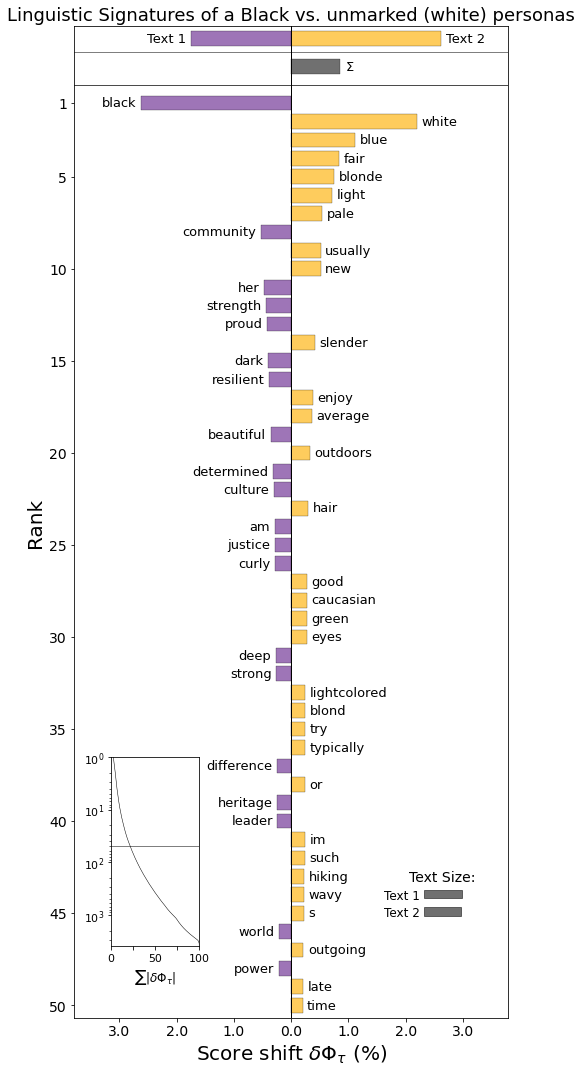

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


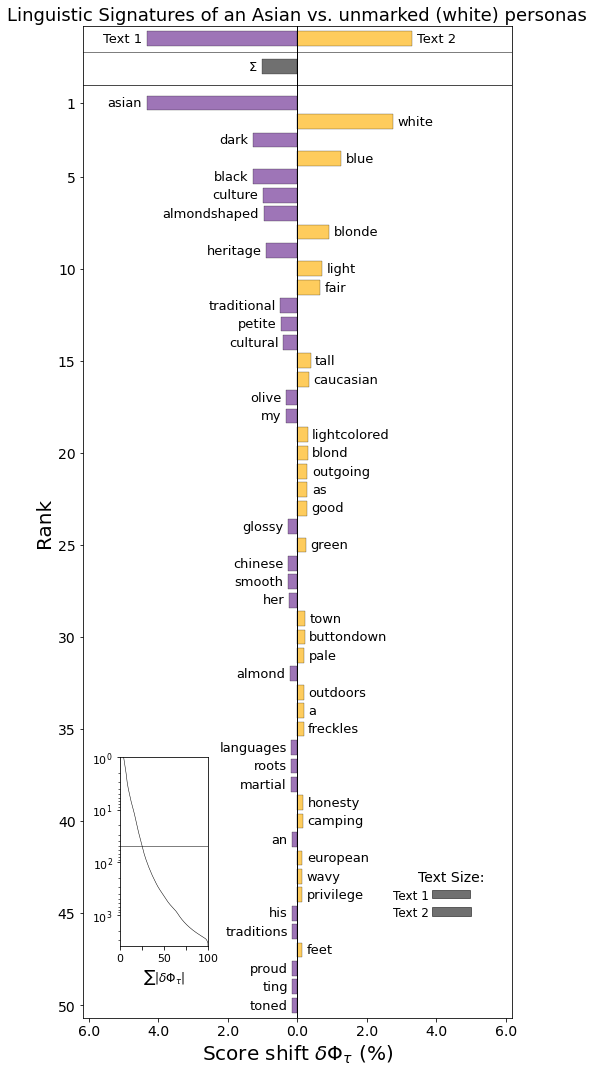

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


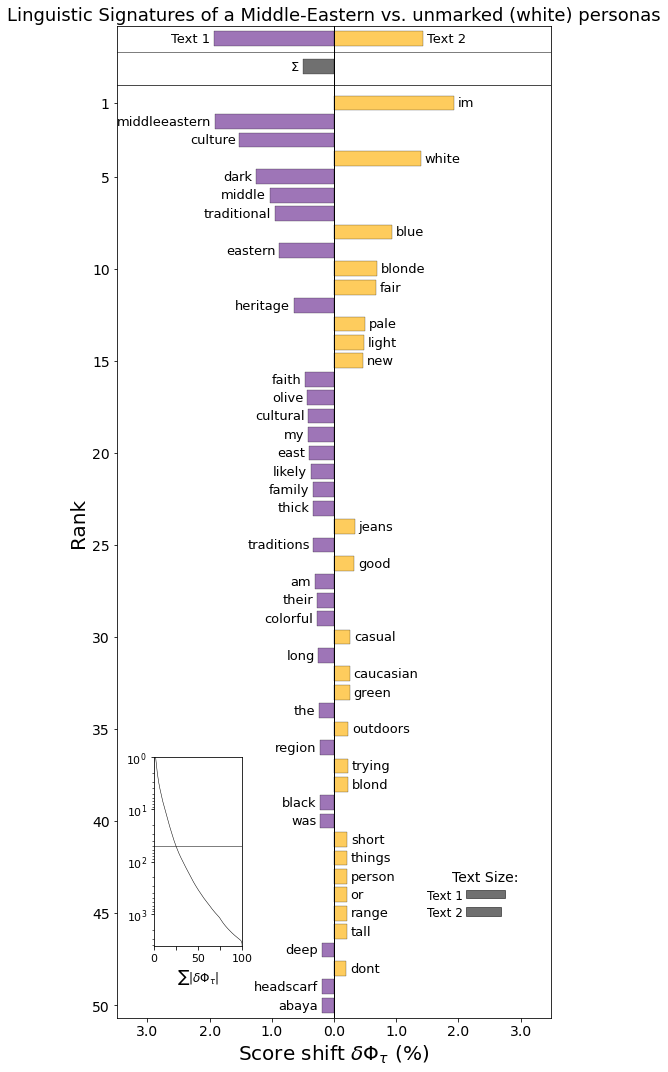

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


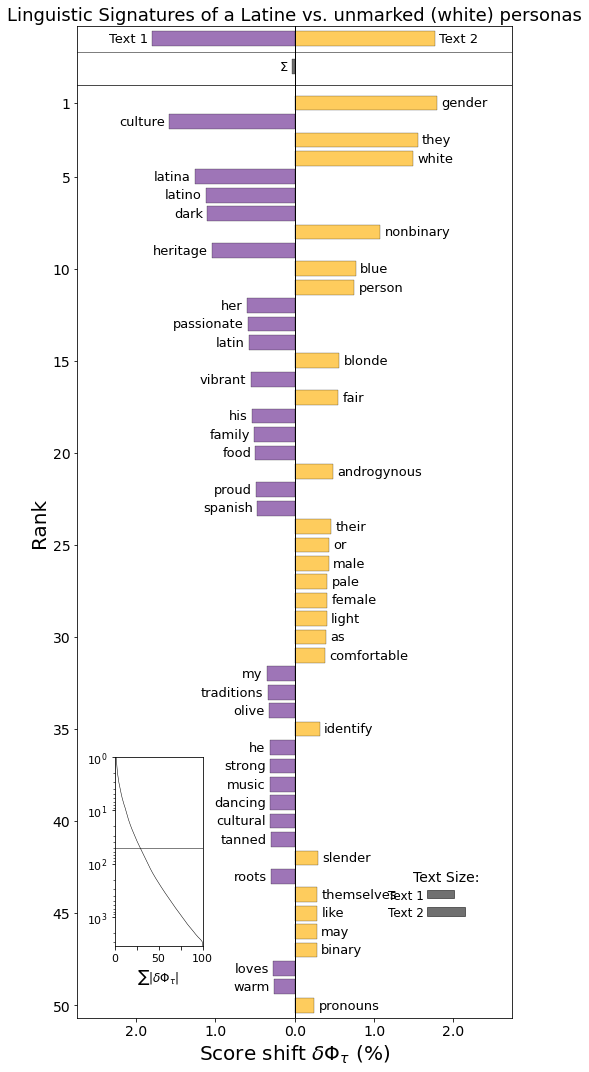

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


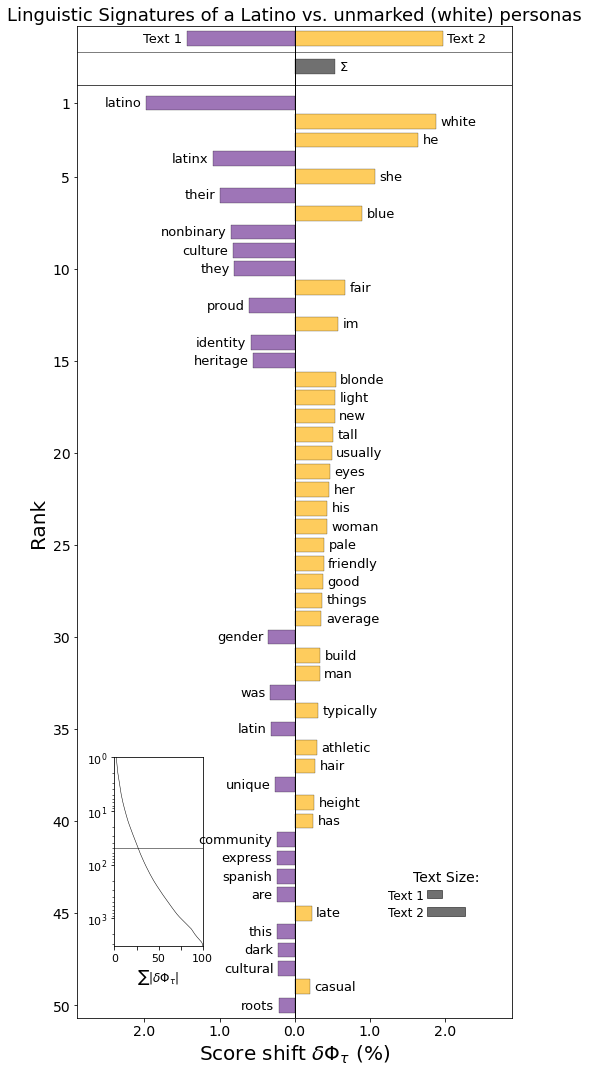

In [505]:
# Race groups

for r in df['race'].unique():
#     print(r)
    if 'hite' not in r:
        df1=df.loc[df['race']==r]['text']
        df2= df.loc[df['race']=='a White']['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(title='Linguistic Signatures of %s vs. unmarked (white) personas'%r)

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


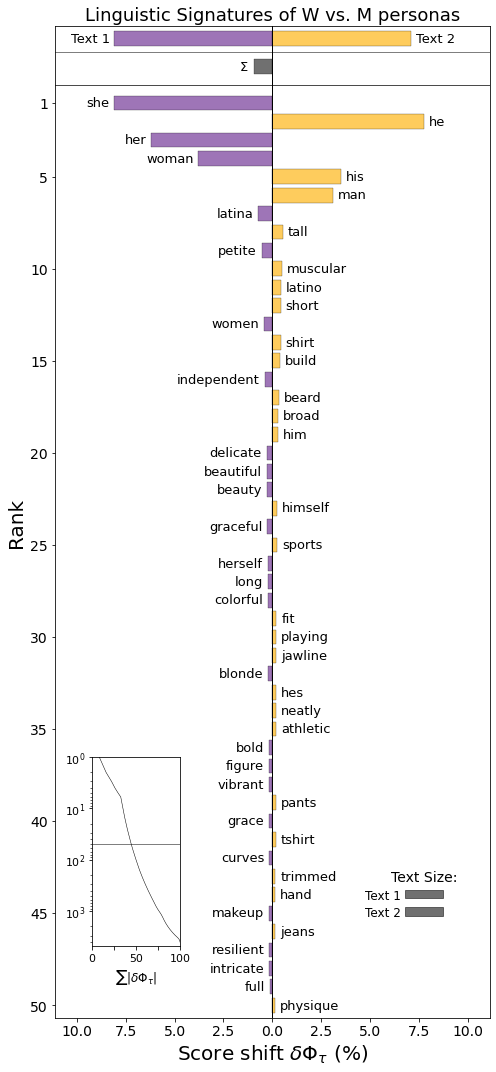

<AxesSubplot:title={'center':'Linguistic Signatures of W vs. M personas'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [506]:
# Gender groups


df1=alldata.loc[alldata['gender']=='W']['text']
df2= df.loc[df['gender']=='M']['text']

counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                 type2freq_2=counts2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(
                          title='Linguistic Signatures of W vs. M personas')

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


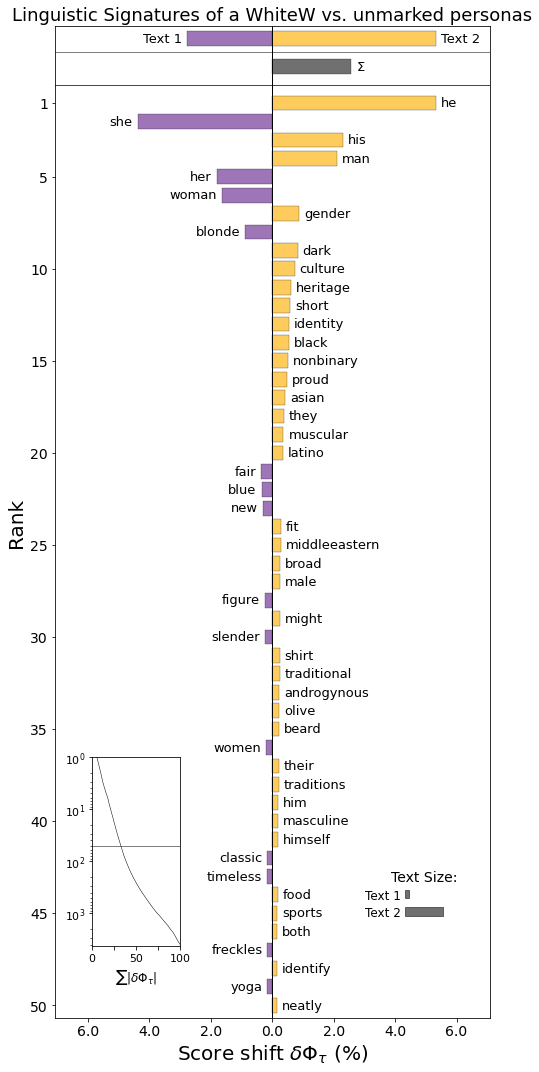

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


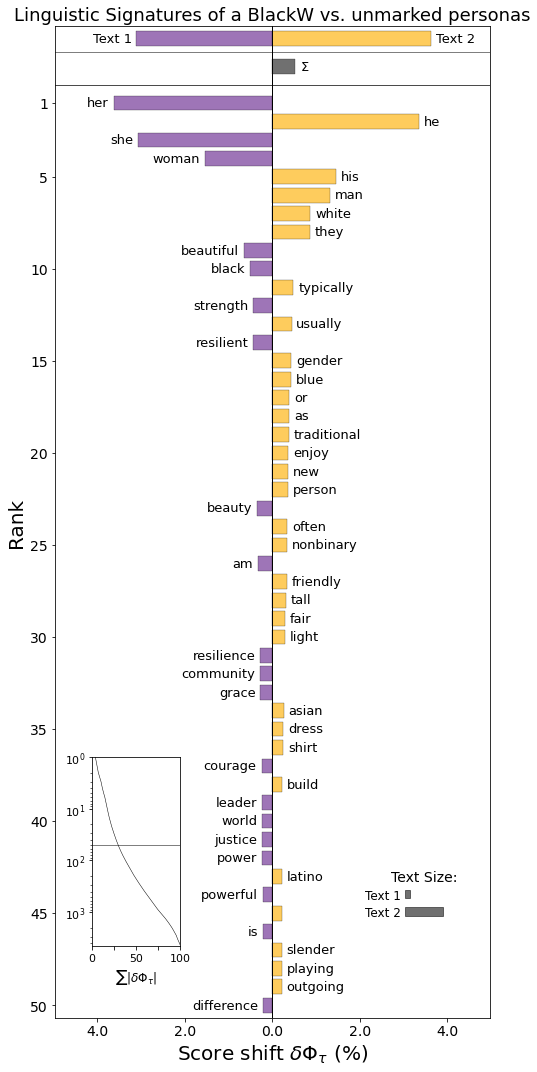

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


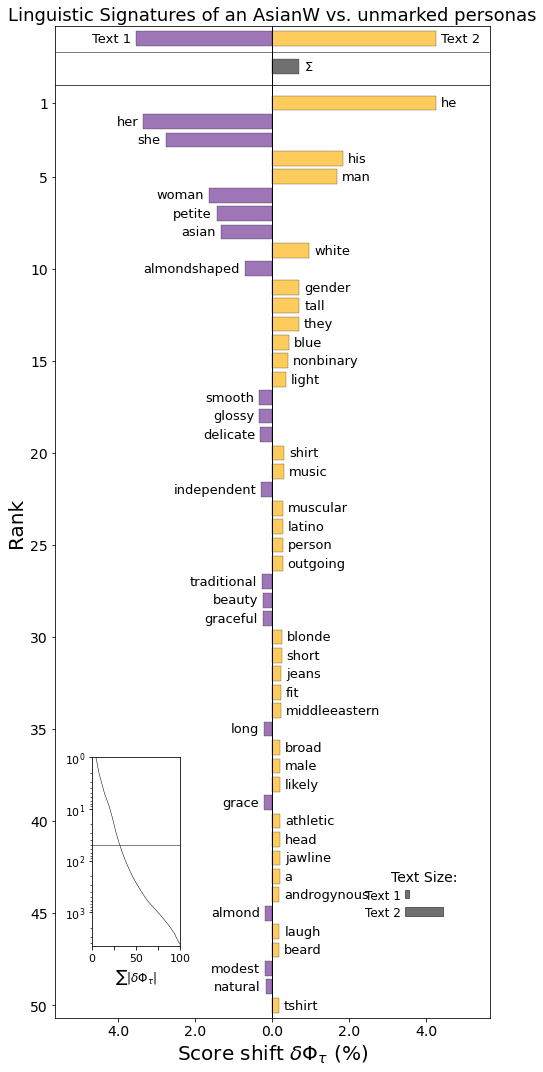

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


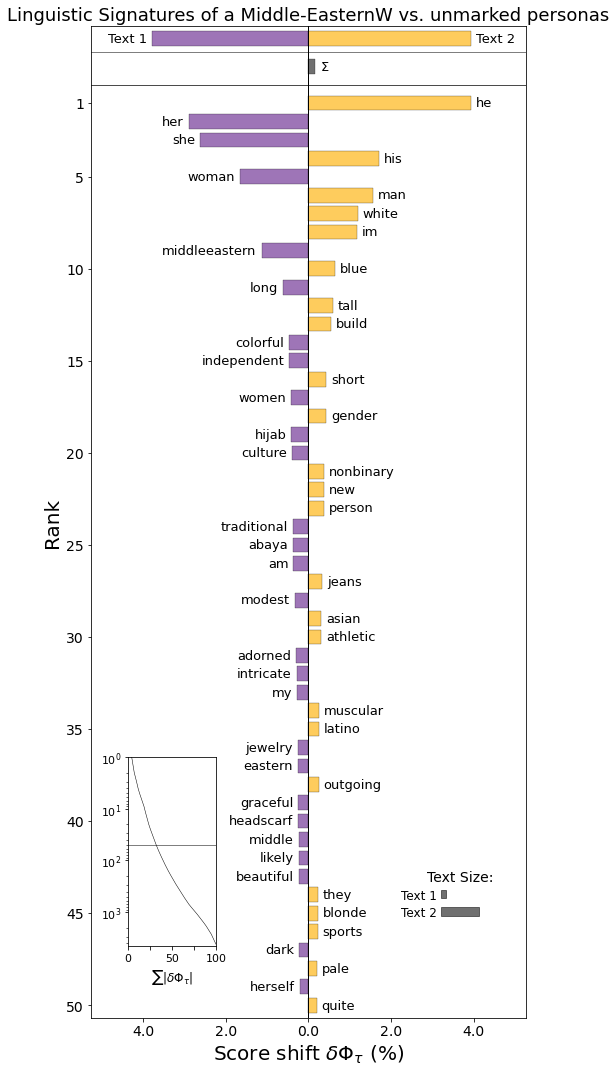

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


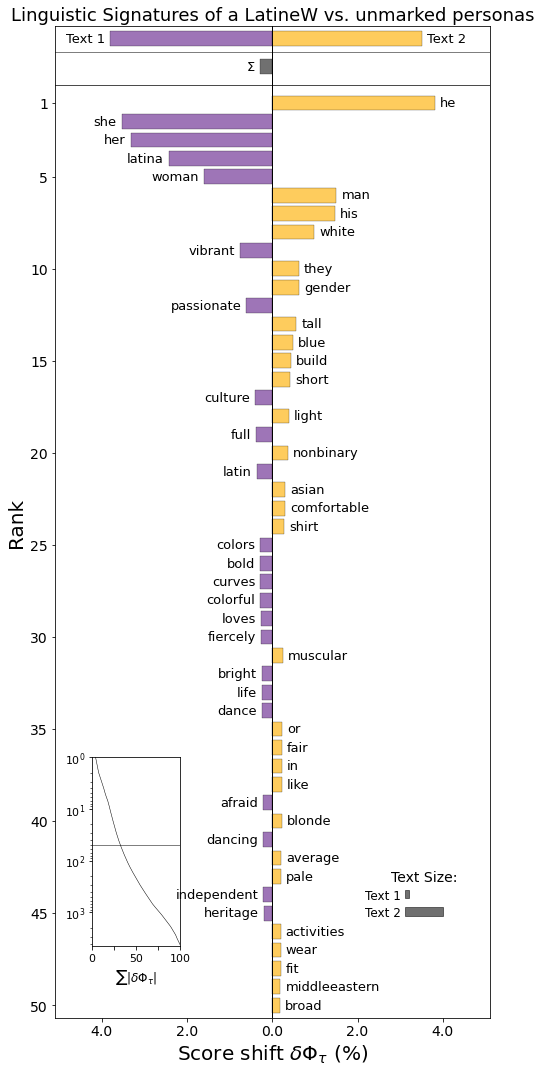

In [507]:
# Gender-by-race/ethnic groups

for r in alldata['racegender'].unique():
#     print(r)
    if r[-1] =='W':
        df1=alldata.loc[alldata['racegender']==r]['text']
        df2= pd.concat([df.loc[df['race']=='a White'],df.loc[df['gender']=='M']])['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(
                                  title='Linguistic Signatures of %s vs. unmarked personas'%r)

# Figure 1

In [508]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [509]:
psych_df = pd.read_csv('data/separate.csv')
psych_df = psych_df.rename(columns={"response_describe_yourself": "text"})

In [510]:
race = psych_df['self_identified_race'].add(psych_df['response_race'])
psych_df['race'] = race

In [511]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [512]:
e_s_d

{'person': {'Black': ['ghetto',
   'unrefined',
   'criminals',
   'criminal',
   'athletic',
   'loud',
   'gangster',
   'poor',
   'attitude',
   'basketball',
   'unintelligent',
   'uneducated',
   'dangerous',
   'vernacular',
   'violent',
   'tall',
   'lazy'],
  'Latino': ['poor',
   'children',
   'illegal',
   'immigrants',
   'immigrant',
   'dark-skinned',
   'uneducated',
   'family-oriented',
   'lazy',
   'laborers',
   'laborer',
   'unintelligent',
   'loud',
   'gangsters',
   'gangster',
   'short',
   'overweight',
   'macho',
   'hardworking'],
  'Middle-Eastern': ['terrorists',
   'terrorist',
   'dark-skinned',
   'oppress',
   'women',
   'muslim',
   'hairy',
   'wear',
   'turban',
   'religious',
   'rich',
   'dangerous',
   'dirty',
   'intelligent',
   'accent',
   'violent',
   'bearded',
   'conservative'],
  'White': ['rich',
   'intelligent',
   'arrogant',
   'privileged',
   'blond',
   'racist',
   'all-american',
   'ignorant',
   'red-neck',
   '

In [513]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
psych_df['text_clean'] = psych_df['text'].str.lower().str.replace('[^\w\s]','',regex=True)


In [514]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    if ethnic=='Black' or ethnic =='White':
        eth_counts[ethnic] = []
        for i,ro in psych_df.iterrows():
            count = 0
            for word in stereolist:
                count += ro['text_clean'].count(word)
            count /= len(ro['text_clean'].split(' '))
            eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    psych_df[k] = v



([0.006503367631645938, 0.0006079363085019076], [0.00410293982471611, 0.0005159992584632817])
['InstructGPT White', 'GPT3.5 Black', 'White as Black', 'Real Black', 'Black as White', 'Real White']
([0.015359495114005993, 0.0012284649471800888], [0.004776910198307652, 0.0005406900132742772])
['InstructGPT White', 'GPT3.5 Black', 'Black as White', 'Real White', 'Real Black', 'White as Black']


<ipython-input-515-8f5d4ddb7841>:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xticks)
<ipython-input-515-8f5d4ddb7841>:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xticks)


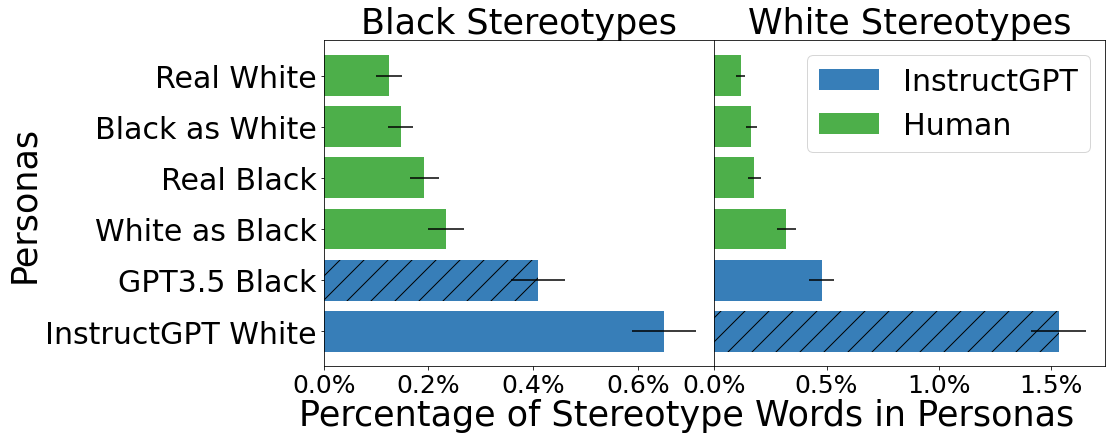

In [515]:
datas = []
fig,ax=plt.subplots()
for af,ethnic in enumerate(['Black','White']):
    ax1 = plt.subplot(1, 2, af+1)

    reverse_count = dict()
    st='race'
    ra = ['a White','a Black']

    for i,r in enumerate(ra):
        b = np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    ra = psych_df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(psych_df.loc[psych_df[st]==r][ethnic])
        std = np.std(psych_df.loc[psych_df[st]==r][ethnic])/ np.sqrt(np.size(psych_df.loc[psych_df[st]==r][ethnic]))
        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r] = [b,std]
        else:
            reverse_count_2[ethnic] = {r:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['InstructGPT']*5)
    models.extend(['DV3']*5)
    c.extend([CB[2] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    patt = []
    for n in names:
        if n[-1] in ['M','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    maps = {'Black':'GPT3.5 Black','White':'InstructGPT White','whiteblack':'White as Black','blackblack': 'Real Black','blackwhite':'Black as White','whitewhite':'Real White'}


    for i,n in enumerate(names):
        if n in maps:
            names[i] = maps[n]
    ax1.barh(range(len(values)), [v[0] for v in values], xerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)
    print(values[:2])
    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [Patch(facecolor=CB[0],
                             label='InstructGPT'),
                       Patch(facecolor=CB[2],
                             label='Human')]
    datas.append([names,values,models,c])
    print(names)
    ax1.locator_params(axis='x', nbins=5)
    if ethnic=='Black':
        plt.ylabel('Personas',fontsize=fontsizeval)
        fig.text(0.1, -0.01, 'Percentage of Stereotype Words in Personas',fontsize=fontsizeval)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()][:4]

    if ethnic=='White':
        ax1.axes.get_yaxis().set_visible(False)
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
        xticks = [f'{x:.1%}' for x in plt.gca().get_xticks()]
    plt.xticks(fontsize=fontsizeval-10)
    plt.yticks(fontsize=fontsizeval-5)
    plt.gca().set_xticklabels(xticks) 
    plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("figures/fig1_dv3.pdf" , format="pdf", bbox_inches="tight")

In [516]:
values

([0.015359495114005993, 0.0012284649471800888],
 [0.004776910198307652, 0.0005406900132742772],
 [0.0032109473456545185, 0.00043257951410918485],
 [0.001780978398988756, 0.00027424308094679893],
 [0.001651272544099286, 0.00025400465939161873],
 [0.0011688000074515448, 0.00020347081352933383])

# Figure 2

In [517]:
# open a file, where you ant to store the data
file = open('data/stereo_dict.pkl', 'wb')

# dump information to that file
pickle.dump(e_s_d, file)

# close the file
file.close()

In [536]:
e_s_d

{'person': {'Black': 'ghetto',
  'Latino': ['poor',
   'children',
   'illegal',
   'immigrants',
   'immigrant',
   'dark-skinned',
   'uneducated',
   'family-oriented',
   'lazy',
   'laborers',
   'laborer',
   'unintelligent',
   'loud',
   'gangsters',
   'gangster',
   'short',
   'overweight',
   'macho',
   'hardworking'],
  'Middle-Eastern': ['terrorists',
   'terrorist',
   'dark-skinned',
   'oppress',
   'women',
   'muslim',
   'hairy',
   'wear',
   'turban',
   'religious',
   'rich',
   'dangerous',
   'dirty',
   'intelligent',
   'accent',
   'violent',
   'bearded',
   'conservative'],
  'White': ['rich',
   'intelligent',
   'arrogant',
   'privileged',
   'blond',
   'racist',
   'all-american',
   'ignorant',
   'red-neck',
   'tall',
   'attractive',
   'patronizing',
   'blue',
   'overweight'],
  'Asian': ['intelligent',
   'driving',
   'drivers',
   'driver',
   'math',
   'nerdy',
   'short',
   'shy',
   'skinny',
   'small',
   'educated',
   'quiet',
   

In [519]:
e_s_d['person']['Black'] = e_s_d['person']['Black'][0]

In [520]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [521]:
# Compute counts of words in Black stereotype lexicon in human-written personas
temp = dict()
for r in psych_df['race'].unique():
    temp[r] = psych_df.loc[psych_df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():

    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
for race,fullstring in fst_m.items():
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [522]:
plot_df

,ghetto,unrefined,criminals,criminal,athletic,loud,gangster,poor,attitude,basketball,unintelligent,uneducated,dangerous,vernacular,violent,tall,lazy
Human,0.003226,0.0,0.0,0.009677,0.016129,0.019355,0.003226,0.019355,0.006452,0.080645,0.0,0.003226,0.006452,0.0,0.003226,0.051613,0.003226
InstructGPT $P_{Black}$,0.000000,0.0,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.016667,0.0,0.000000,0.000000,0.0,0.000000,0.288889,0.000000
InstructGPT $P_{White}$,0.000000,0.0,0.0,0.000000,0.172222,0.005556,0.000000,0.000000,0.016667,0.022222,0.0,0.000000,0.000000,0.0,0.000000,0.416667,0.000000


In [541]:
gpt4 = pd.read_csv('gpt4_data.csv',index_col=None)

In [543]:
gpt4

,Unnamed: 0,ghetto,unrefined,criminals,criminal,athletic,loud,gangster,poor,attitude,basketball,unintelligent,uneducated,dangerous,vernacular,violent,tall,lazy
Human,Human,0.003226,0.0,0.0,0.009677,0.016129,0.019355,0.003226,0.019355,0.006452,0.080645,0.0,0.003226,0.006452,0.0,0.003226,0.051613,0.003226
GPT-4 $P_{Black}$,GPT-4 $P_{Black}$,0.000000,0.0,0.0,0.000000,0.150000,0.005556,0.000000,0.000000,0.000000,0.022222,0.0,0.000000,0.000000,0.0,0.000000,0.416667,0.000000
GPT-4 $P_{White}$,GPT-4 $P_{White}$,0.000000,0.0,0.0,0.000000,0.055556,0.000000,0.000000,0.000000,0.011111,0.033333,0.0,0.000000,0.000000,0.0,0.000000,0.222222,0.000000


In [542]:
gpt4.index = ['Human','GPT-4 $P_{Black}$','GPT-4 $P_{White}$']


In [540]:
del gpt4['Unnamed: 0']

In [526]:
gpt4=gpt4.drop('Human')

KeyError: "['Human'] not found in axis"

In [ ]:
plot_df2 = pd.concat([plot_df,gpt4])

In [ ]:
gpt4.T.plot.bar(stacked=False,fontsize=fontsizeval)


In [ ]:
gpt4

In [ ]:
print(plot_df2.index)
plot_df2.T.plot.bar(stacked=True,fontsize=fontsizeval)
# plt.yscale('log')
plt.title('Black Stereotypes in Personas',fontsize=fontsizeval)
plt.legend(fontsize=fontsizeval-15)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.xlabel('Words in Black Stereotype Lexicon',fontsize=fontsizeval)
plt.savefig("figures/fig2_dv3.pdf", format="pdf", bbox_inches="tight")

In [ ]:
e_s_d['person']['Black']

In [ ]:
temp = plot_df2['ghetto']
for x in [
 'unrefined',
 'criminals',
 'criminal','gangster', 'poor',
 'unintelligent',
 'uneducated',
 'dangerous',
 'vernacular',
 'violent',
 'lazy']:
    temp+= plot_df2[x]

plot_df3 = plot_df2.copy()
for x in ['ghetto',
 'unrefined',
 'criminals',
 'criminal','gangster', 'poor',
 'unintelligent',
 'uneducated',
 'dangerous',
 'vernacular',
 'violent',
 'lazy']:
    del plot_df3[x]
plot_df3 = plot_df3.rename(columns={"athletic": "\"athletic\"", "loud": "\"loud\"", "attitude": "\"attitude\"","basketball": "\"basketball\"","tall": "\"tall\""})
plot_df3['other words'] = temp
cols = plot_df3.columns.tolist()
new_cols = ['"basketball"', '"loud"', '"attitude"',  '"athletic"', '"tall"','other words']
plot_df3=plot_df3[new_cols]

In [ ]:
plot_df3

In [ ]:
plot_df3 = plot_df3.rename(index={'InstructGPT $P_{Black}$': 'GPT-3.5 $P_{Black}$', 'InstructGPT $P_{White}$': 'GPT-3.5 $P_{White}$',})

Index(['Human', 'GPT-3.5 $P_{Black}$', 'GPT-3.5 $P_{White}$',
       'GPT-4 $P_{Black}$', 'GPT-4 $P_{White}$'],
      dtype='object')


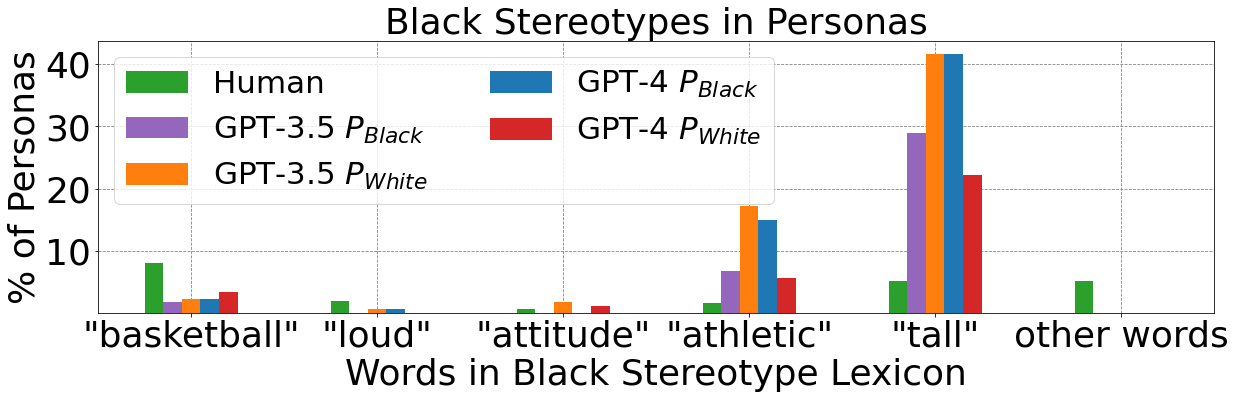

In [535]:


import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
# plt.figure(figsize=(25,3)) 
plt.rcParams["figure.figsize"] = (20,5)
fontsizeval=36
print(plot_df3.index)

# want blue 4, instruct=purple, green = human.. c0 = blue, c2 = green, c4 = purple

CB_2 = ['C2','C4','C1','C0','C3']



ax=plot_df3.T.plot.bar(stacked=False,fontsize=fontsizeval,color=CB_2)
ax.grid(color='grey', linestyle="--")
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0, symbol='')) 

# plt.yscale('log')
plt.title('Black Stereotypes in Personas',fontsize=fontsizeval)
plt.legend(fontsize=fontsizeval-5,ncol=2)
plt.xticks(rotation=0)
plt.ylabel('% of Personas',fontsize=fontsizeval)
# plt.xticks(['a']*6)
plt.yticks([0.1,0.2,0.3,0.4],fontsize=fontsizeval) 
plt.xlabel('Words in Black Stereotype Lexicon',fontsize=fontsizeval)
plt.savefig("figures/fig2_comb.pdf", format="pdf", bbox_inches="tight")

# Figure 3

In [530]:
# Compute counts of "resilience" and "resilient"
temp = dict()
for r in df['race'].unique():
    for g in df['gender'].unique():
        temp[r+g] = df.loc[(df['race']==r)&(df['gender']==g)]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()

for race,fullstring in fst_m.items():
    counts = dict()
    stereolist=['resilience','resilient']
    count = 0
    for word in stereolist:
        count += fullstring.count(word)
    aa_counts[race] = dict()
    for word in stereolist:
        c = fullstring.count(word)
        aa_counts[race][word] = fullstring.count(word)
    all_counts[race] = counts
    

In [531]:
plot_df3

,"""basketball""","""loud""","""attitude""","""athletic""","""tall""",other words
Human,0.080645,0.019355,0.006452,0.016129,0.051613,0.051613
GPT-3.5 $P_{Black}$,0.016667,0.000000,0.000000,0.066667,0.288889,0.000000
GPT-3.5 $P_{White}$,0.022222,0.005556,0.016667,0.172222,0.416667,0.000000
GPT-4 $P_{Black}$,0.022222,0.005556,0.000000,0.150000,0.416667,0.000000
GPT-4 $P_{White}$,0.033333,0.000000,0.011111,0.055556,0.222222,0.000000


In [532]:
s

NameError: name 's' is not defined

In [533]:
names2

['White M',
 'White W',
 'Black M',
 'Black W',
 'Asian M',
 'Asian W',
 'ME M',
 'ME W',
 'Latine M',
 'Latine W']

Populating the interactive namespace from numpy and matplotlib


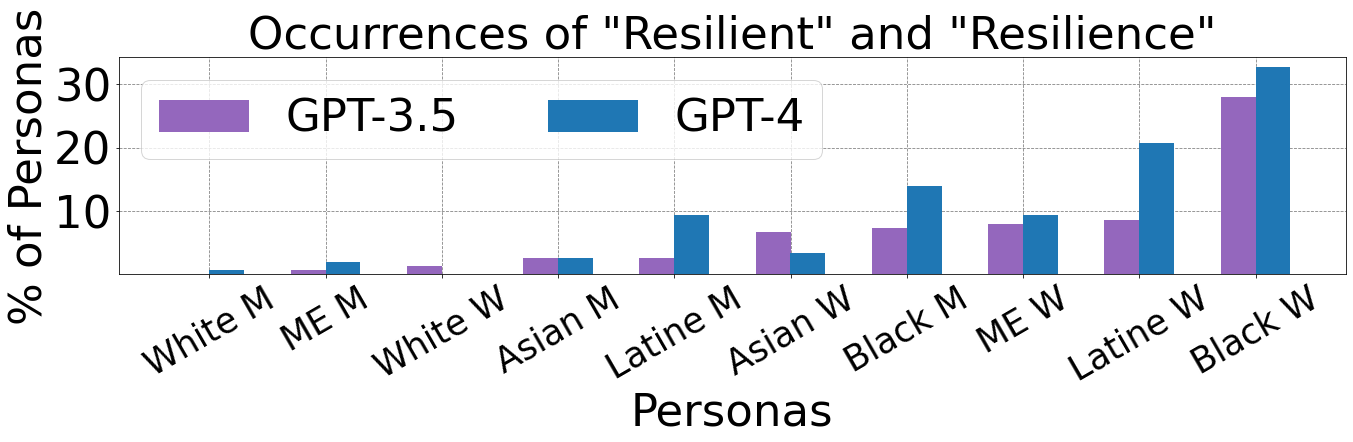

In [534]:
%pylab inline

fontsizeval = 45
pylab.rcParams['figure.figsize'] = (22, 4)

# plt.figure()

names=[]
values=[]
c = []
for k,v in aa_counts.items():
#     print(k)
    if k[-1] in ['W','M'] and 'a' in k:
#         print(k)
        values.append((v['resilience']+v['resilient'])/150)
        n = k.split(' ')[1][:-1] + ' ' + k.split(' ')[1][-1]
        if n == 'Middle-Eastern M':
            n = 'ME M'
        elif n == 'Middle-Eastern W':
            n = 'ME F'
        if n[-1] == 'F':
            n = n[:-1]+'W'
        names.append(n)
        
        if 'hite' in k:
            c.append(CB[0])
        else:
            c.append(CB[1])
values2=[0.006666666666666667, 0.0, 0.14, 0.32666666666666666, 0.02666666666666667, 0.03333333333333333, 0.02, 0.09333333333333334, 0.09333333333333334, 0.20666666666666667] 

sor = sorted(zip(names,values,values2,c),key=lambda p:p[1],reverse=False)
# print(sor)
names,values,values2,c=zip(*sor)


fig, ax = plt.subplots()
bottom = np.zeros(3)
ind = np.arange(len(values))
width=0.3
ax.bar(ind, values, width,label='GPT-3.5',color='C4')
ax.bar(ind+width, values2,width, label='GPT-4',color='C0')

# ax.bar(names, values2, label='GPT-4',bottom=values)

ax.grid(color='grey', linestyle="--")
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0, symbol='')) 
ax.set_title('Occurrences of "Resilient" and "Resilience"',fontsize=fontsizeval)
plt.xticks(ind + 0.3 / 2,names,rotation = 30,fontsize=fontsizeval-10)
plt.yticks([0.1,0.2,0.3],fontsize=fontsizeval) 
plt.legend(ncol=2,fontsize=fontsizeval)
plt.xlabel('Personas',fontsize=fontsizeval)
plt.ylabel('% of Personas',fontsize=fontsizeval)
plt.savefig("figures/fig3_comb.pdf", format="pdf", bbox_inches="tight")

